In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns


In [7]:
data =pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:
data.shape

(8784, 8)

In [9]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
data.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [12]:
data.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [13]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [14]:
data.Weather.nunique()

50

In [15]:
x= 'Thunderstorms,Moderate Rain Showers,Fog'

In [16]:
list_of_lists  = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [17]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [18]:
def Create_list(x):
    list_of_lists =  [w.split()  for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

In [19]:
def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+FOG'
    elif 'Rain' in list1:
        return 'SNOW'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'




In [20]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [21]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [22]:
data['Std_Weather'] = data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [23]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [24]:
data.Std_Weather.value_counts()

,count
Std_Weather,
Cloudy,3797
Clear,3432
RAIN,569
SNOW,534
FOG,297
RAIN+FOG,129
SNOW+FOG,26


In [25]:
cloudy_df = data[data['Std_Weather'] == 'Cloudy'].sample(600)
cloudy_df.shape

(600, 9)

In [26]:
cloudy_df = data[data['Std_Weather'] == 'Cloudy']
cloudy_df_sample = cloudy_df.sample(600)
cloudy_df_sample.shape

(600, 9)

In [27]:
clear_df = data[data['Std_Weather'] == 'Clear'].sample(600)
clear_df.shape

(600, 9)

In [28]:
rain_df=data[data['Std_Weather']=='RAIN']

In [29]:
snow_df= data[data['Std_Weather']== 'SNOW']

In [30]:
weather_df = pd.concat([cloudy_df_sample, clear_df, rain_df, snow_df], axis = 0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
7168,10/25/2012 16:00,13.3,4.2,54,15,24.1,101.59,Mostly Cloudy,Cloudy
1245,2/21/2012 21:00,-0.5,-4.9,72,6,25.0,100.40,Cloudy,Cloudy
7564,11/11/2012 4:00,0.9,-4.3,68,20,25.0,102.34,Cloudy,Cloudy
8192,12/7/2012 8:00,-3.3,-5.4,85,7,24.1,101.29,Cloudy,Cloudy
7505,11/8/2012 17:00,3.2,-4.2,58,13,24.1,101.20,Mostly Cloudy,Cloudy


In [31]:
weather_df.shape

(2303, 9)

In [32]:
weather_df.Std_Weather.value_counts()

,count
Std_Weather,
Cloudy,600
Clear,600
RAIN,569
SNOW,534


In [33]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7168,13.3,4.2,54,15,24.1,101.59,Cloudy
1245,-0.5,-4.9,72,6,25.0,100.40,Cloudy
7564,0.9,-4.3,68,20,25.0,102.34,Cloudy
8192,-3.3,-5.4,85,7,24.1,101.29,Cloudy
7505,3.2,-4.2,58,13,24.1,101.20,Cloudy


In [34]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [35]:
weather_df.isnull().sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Std_Weather,0


In [36]:
weather_df.dtypes

,0
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Std_Weather,object


In [37]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,6.811680,1.638385,71.777247,16.591403,23.456057,100.805471
std,11.481525,10.709596,15.756134,9.454461,12.279006,0.916114
min,-21.000000,-26.600000,21.000000,0.000000,0.600000,97.520000
25%,-3.000000,-6.900000,62.000000,9.000000,16.100000,100.280000
50%,5.600000,0.600000,74.000000,15.000000,24.100000,100.830000
75%,16.900000,10.900000,84.000000,22.000000,25.000000,101.420000
max,32.100000,23.100000,100.000000,83.000000,48.300000,103.580000


In [38]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']


In [39]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.944633,-0.220092,-0.126755,0.387494,-0.125282
Dew Point Temp_C,0.944633,1.000000,0.106453,-0.116140,0.185433,-0.228774
Rel Hum_%,-0.220092,0.106453,1.000000,0.043140,-0.640379,-0.319541
Wind Speed_km/h,-0.126755,-0.116140,0.043140,1.000000,-0.161819,-0.404603
Visibility_km,0.387494,0.185433,-0.640379,-0.161819,1.000000,0.302934
Press_kPa,-0.125282,-0.228774,-0.319541,-0.404603,0.302934,1.000000


<Axes: >

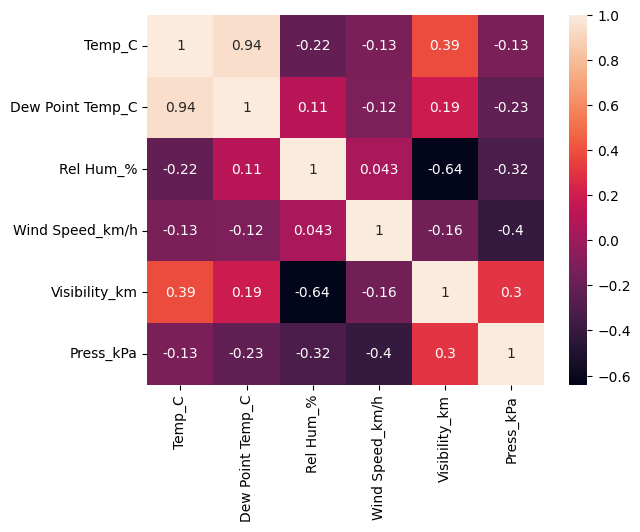

In [40]:
sns.heatmap(cor_matrix,annot=True)

In [41]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

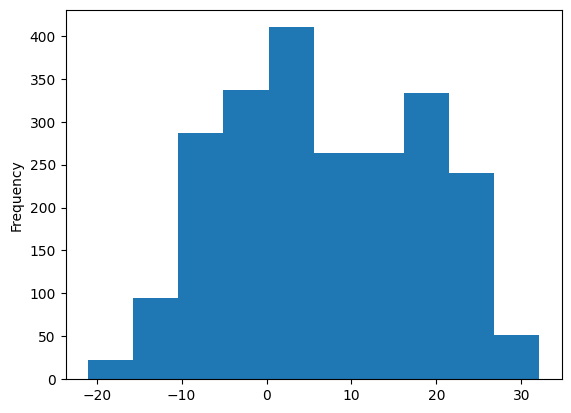

In [42]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

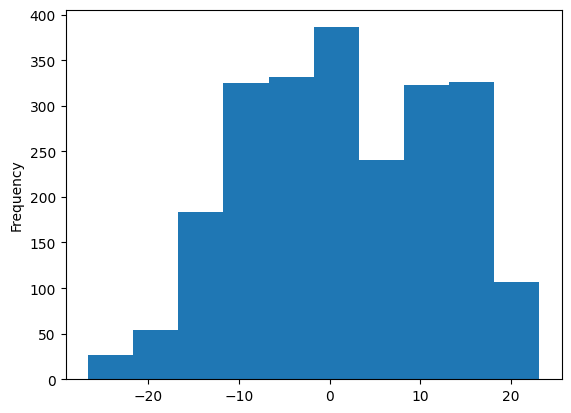

In [43]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

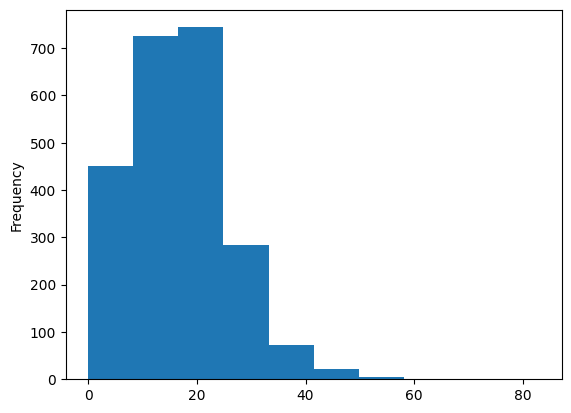

In [44]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

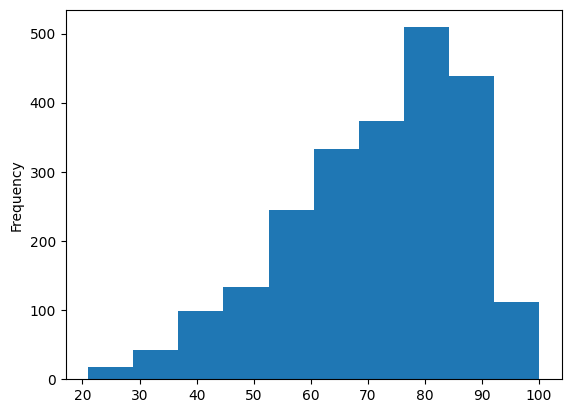

In [45]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: >

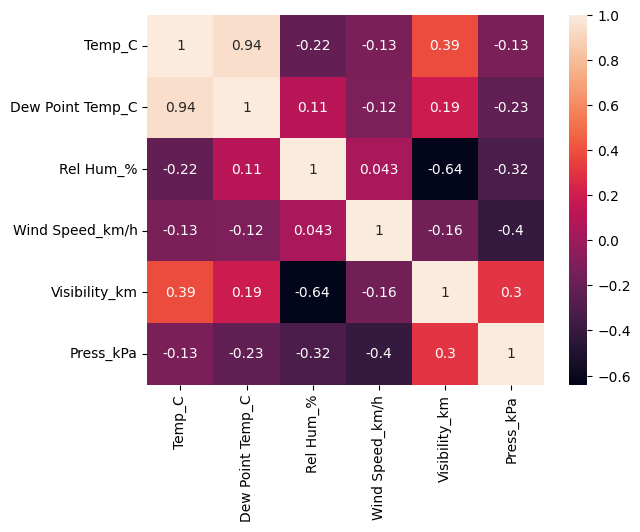

In [46]:
sns.heatmap(cor_matrix,annot=True)

In [47]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

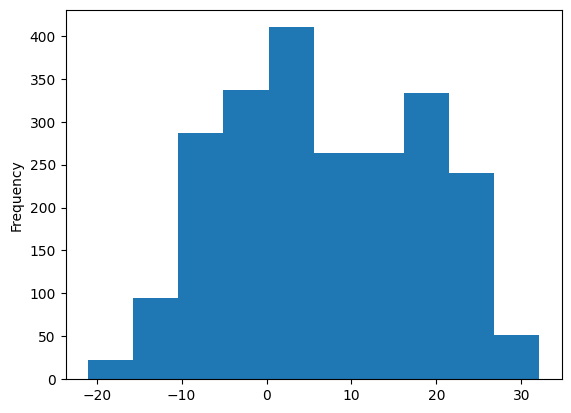

In [48]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

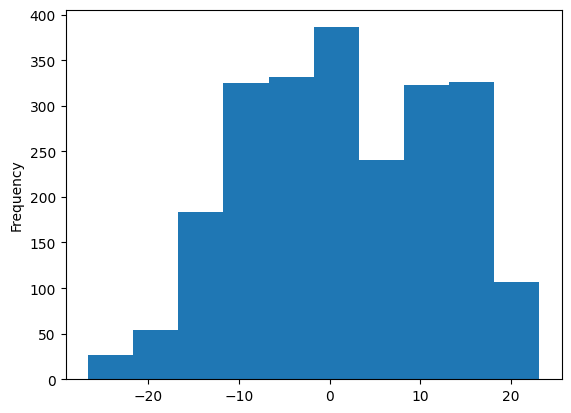

In [49]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

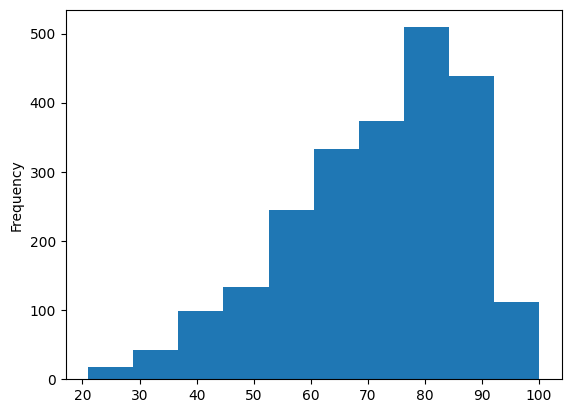

In [50]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

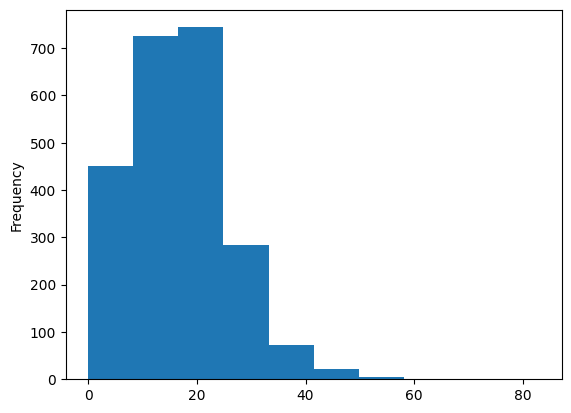

In [51]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: >

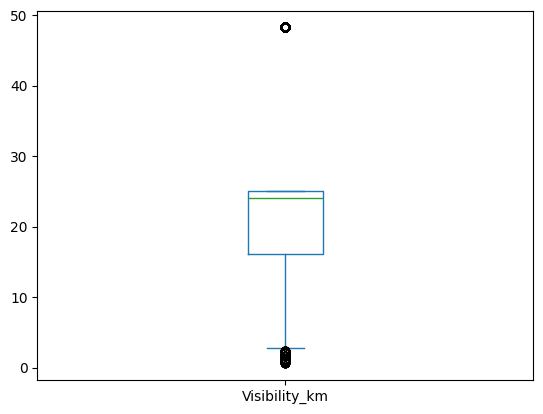

In [52]:
weather_df['Visibility_km'].plot(kind='box')

<Axes: >

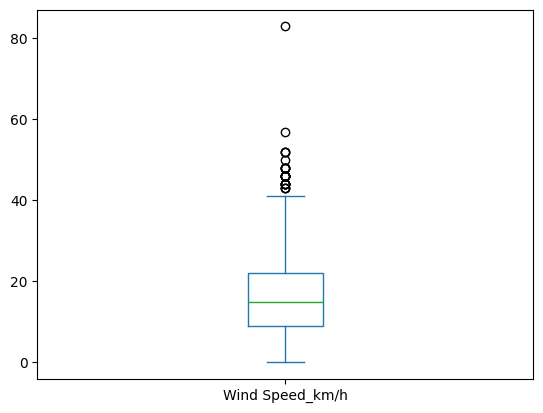

In [53]:
weather_df['Wind Speed_km/h'].plot(kind='box')

In [54]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7168,13.3,4.2,54,15,24.1,101.59,Cloudy
1245,-0.5,-4.9,72,6,25.0,100.40,Cloudy
7564,0.9,-4.3,68,20,25.0,102.34,Cloudy
8192,-3.3,-5.4,85,7,24.1,101.29,Cloudy
7505,3.2,-4.2,58,13,24.1,101.20,Cloudy


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_Encoder=LabelEncoder()

In [57]:
weather_df['Std_Weather']=label_Encoder.fit_transform(weather_df['Std_Weather'])

In [58]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [59]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7168,13.3,4.2,54,15,24.1,101.59,1
1245,-0.5,-4.9,72,6,25.0,100.40,1
7564,0.9,-4.3,68,20,25.0,102.34,1
8192,-3.3,-5.4,85,7,24.1,101.29,1
7505,3.2,-4.2,58,13,24.1,101.20,1


In [60]:
weather_df.Std_Weather.value_counts()

,count
Std_Weather,
1,600
0,600
2,569
3,534


In [61]:
X=weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
7168,13.3,4.2,54,15,24.1,101.59
1245,-0.5,-4.9,72,6,25.0,100.40
7564,0.9,-4.3,68,20,25.0,102.34
8192,-3.3,-5.4,85,7,24.1,101.29
7505,3.2,-4.2,58,13,24.1,101.20
...,...,...,...,...,...,...
8537,1.3,0.2,92,46,12.9,97.76
8538,1.4,0.3,92,46,25.0,97.56
8539,2.3,1.1,92,37,11.3,97.52
8540,2.4,1.7,95,15,9.7,97.58


In [62]:
y=weather_df['Std_Weather']
y

,Std_Weather
7168,1
1245,1
7564,1
8192,1
7505,1
...,...
8537,3
8538,3
8539,3
8540,3


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std_scaler=StandardScaler()

In [65]:
X_std=std_scaler.fit_transform(X)
X_std

array([[ 0.56523231,  0.23924073, -1.12851975, -0.16835947,  0.05245397,
         0.85655163],
       [-0.63695968, -0.61064905,  0.01414061, -1.12049774,  0.12576572,
        -0.44269493],
       [-0.51499818, -0.55461236, -0.23978392,  0.36060624,  0.12576572,
         1.67540451],
       ...,
       [-0.39303667, -0.05028216,  1.28376322,  2.15908964, -0.99020213,
        -3.58708997],
       [-0.38432513,  0.00575453,  1.47420662, -0.16835947, -1.12053414,
        -3.52158174],
       [-0.48015203, -0.1156583 ,  1.41072549,  0.57219252, -1.12053414,
        -3.45607351]])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [68]:
x_train.shape,x_test.shape

((1842, 6), (461, 6))

In [69]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

In [70]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred_dt=decision_tree_model.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
accuracy_score(y_test,y_pred_dt)

0.5683297180043384

In [74]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       114
           1       0.44      0.40      0.42       127
           2       0.78      0.78      0.78       121
           3       0.55      0.59      0.57        99

    accuracy                           0.57       461
   macro avg       0.57      0.57      0.57       461
weighted avg       0.57      0.57      0.57       461



<Axes: >

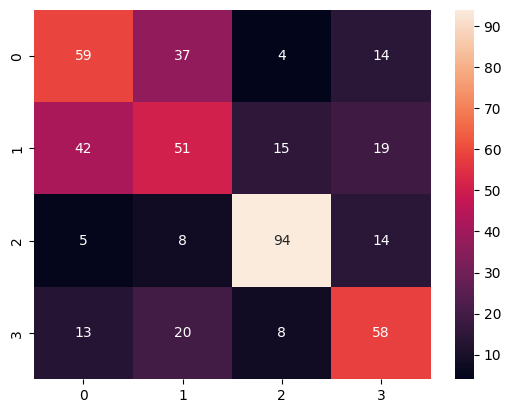

In [75]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_model = RandomForestClassifier()

In [78]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [79]:
y_pred_rf = rf_model.predict(x_test)

In [80]:
accuracy_score(y_test, y_pred_rf)

0.6203904555314533

In [81]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from  sklearn.linear_model  import LogisticRegression
from  sklearn.naive_bayes import  GaussianNB

In [82]:
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()
svc_model=SVC()
knn_model=KNeighborsClassifier()
lr_model=LogisticRegression()
nb_model=GaussianNB()

In [83]:
model_list=[dt_model,rf_model,svc_model,knn_model,lr_model,nb_model]

In [84]:
acc_list=[]
for  model in model_list:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [85]:
acc_list

[0.5509761388286334,
 0.648590021691974,
 0.6225596529284165,
 0.6052060737527115,
 0.6073752711496746,
 0.5704989154013015]

In [86]:
model_df=pd.DataFrame({'Model':model_list,"Accuracy":acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.550976
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.648590
2,SVC(),0.622560
3,KNeighborsClassifier(),0.605206
4,LogisticRegression(),0.607375
5,GaussianNB(),0.570499


In [87]:
from sklearn.model_selection  import cross_val_score
scores=cross_val_score(rf_model,X_std,y,cv=5,scoring='accuracy')
print('Cross-validation scores=',scores)

Cross-validation scores= [0.56832972 0.60737527 0.65509761 0.51956522 0.62608696]


In [88]:
scores.mean()

0.595290955389984

In [89]:
from sklearn.model_selection  import  GridSearchCV,RandomizedSearchCV

In [90]:
parameters={
    'n_estimators':[50,100],
    'max_features':['sqrt','log2',None]
}

In [91]:
grid_search=GridSearchCV(estimator=rf_model,param_grid=parameters)

In [92]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [93]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [94]:
Random_forest_model_new=RandomForestClassifier(max_features='log2',n_estimators=50)

In [95]:
Random_forest_model_new.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [96]:
y_pred_rf=Random_forest_model_new.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred_rf)

0.6247288503253796

In [98]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Random_forest_model_new,X_std,y,cv=5,scoring='accuracy')
print('Cross-validation scores=',scores)

Cross-validation scores= [0.56399132 0.60520607 0.62906725 0.48695652 0.60652174]


In [99]:
scores.mean()

0.578348580590399

In [100]:
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
data=pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [102]:
print(data.shape)
print("")
print(data.columns)
print("")
print(data.dtypes)
print("")
print(data.info)


(8784, 8)

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

<bound method DataFrame.info of              Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779

In [103]:
data.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [104]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [105]:
data.Weather.nunique()

50

In [106]:
x='Thunderstorms,Moderate Rain Showers,Fog '

In [107]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [108]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [109]:
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')]
    flat_list=list(chain(*list_of_lists))
    return flat_list





In [110]:
def  Get_Weather(list1):
    if  'Fog' in list1  and 'Rain'  in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1  and 'Rain'  in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return  'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear'  in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return  'RAIN'

In [111]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [112]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [113]:
data['std_Weather']=data['Weather'].apply(lambda x:Get_Weather(Create_list(x)))

In [114]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [115]:
data.std_Weather.value_counts()

,count
std_Weather,
Cloudy,3797
Clear,3432
RAIN,603
SNOW,556
FOG,241
RAIN+FOG,129
SNOW+RAIN,26


In [116]:
cloudy_df=data[data['std_Weather']=='Cloudy'].sample(600)
cloudy_df.shape

(600, 9)

In [117]:
clear_df=data[data['std_Weather']=='Clear'].sample(600)
clear_df.shape

(600, 9)

In [118]:
rain_df=data[data['std_Weather']=='RAIN']
snow_df=data[data['std_Weather']=='SNOW']

In [119]:
rain_df.shape

(603, 9)

In [120]:
snow_df.shape

(556, 9)

In [121]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
295,1/13/2012 7:00,-5.1,-7.7,82,22,16.1,98.84,Cloudy,Cloudy
6882,10/13/2012 18:00,8.8,-2.4,45,7,25.0,102.01,Cloudy,Cloudy
8162,12/6/2012 2:00,-2.9,-9.4,61,17,25.0,102.21,Mostly Cloudy,Cloudy
1074,2/14/2012 18:00,1.3,-3.9,68,9,25.0,101.08,Cloudy,Cloudy
4513,7/7/2012 1:00,25.1,17.2,62,11,25.0,100.40,Cloudy,Cloudy


In [122]:
weather_df.shape

(2359, 9)

In [123]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [124]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
295,-5.1,-7.7,82,22,16.1,98.84,Cloudy
6882,8.8,-2.4,45,7,25.0,102.01,Cloudy
8162,-2.9,-9.4,61,17,25.0,102.21,Cloudy
1074,1.3,-3.9,68,9,25.0,101.08,Cloudy
4513,25.1,17.2,62,11,25.0,100.40,Cloudy


In [125]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather


In [126]:
weather_df.isnull().sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
std_Weather,0


In [127]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.00000,2359.000000,2359.000000
mean,6.508817,1.376939,72.040695,16.59220,23.298728,100.829033
std,11.350590,10.555227,16.102646,9.39862,12.782013,0.916415
min,-23.300000,-28.500000,21.000000,0.00000,0.600000,97.520000
25%,-3.100000,-7.000000,62.000000,9.00000,16.100000,100.330000
50%,5.300000,0.400000,75.000000,15.00000,24.100000,100.870000
75%,16.500000,10.300000,85.000000,22.00000,25.000000,101.440000
max,33.000000,23.200000,99.000000,83.00000,48.300000,103.430000


In [128]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']


In [129]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.940307,-0.231543,-0.135910,0.371351,-0.096737
Dew Point Temp_C,0.940307,1.000000,0.106946,-0.134143,0.157453,-0.208376
Rel Hum_%,-0.231543,0.106946,1.000000,0.022006,-0.659831,-0.338724
Wind Speed_km/h,-0.135910,-0.134143,0.022006,1.000000,-0.129333,-0.394752
Visibility_km,0.371351,0.157453,-0.659831,-0.129333,1.000000,0.336296
Press_kPa,-0.096737,-0.208376,-0.338724,-0.394752,0.336296,1.000000


<Axes: >

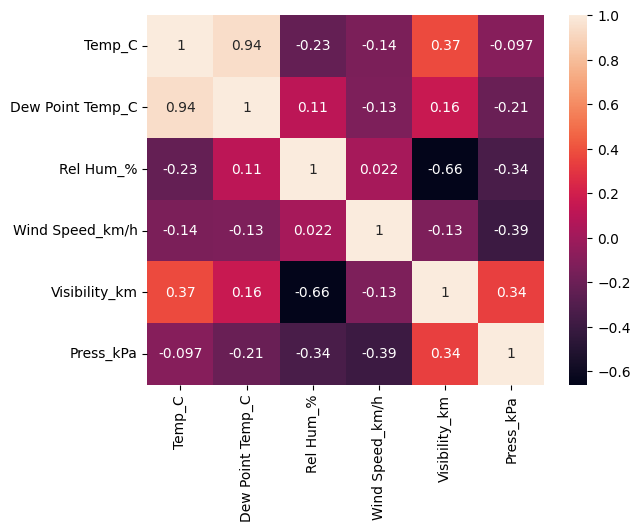

In [130]:
sns.heatmap(cor_matrix,annot=True)


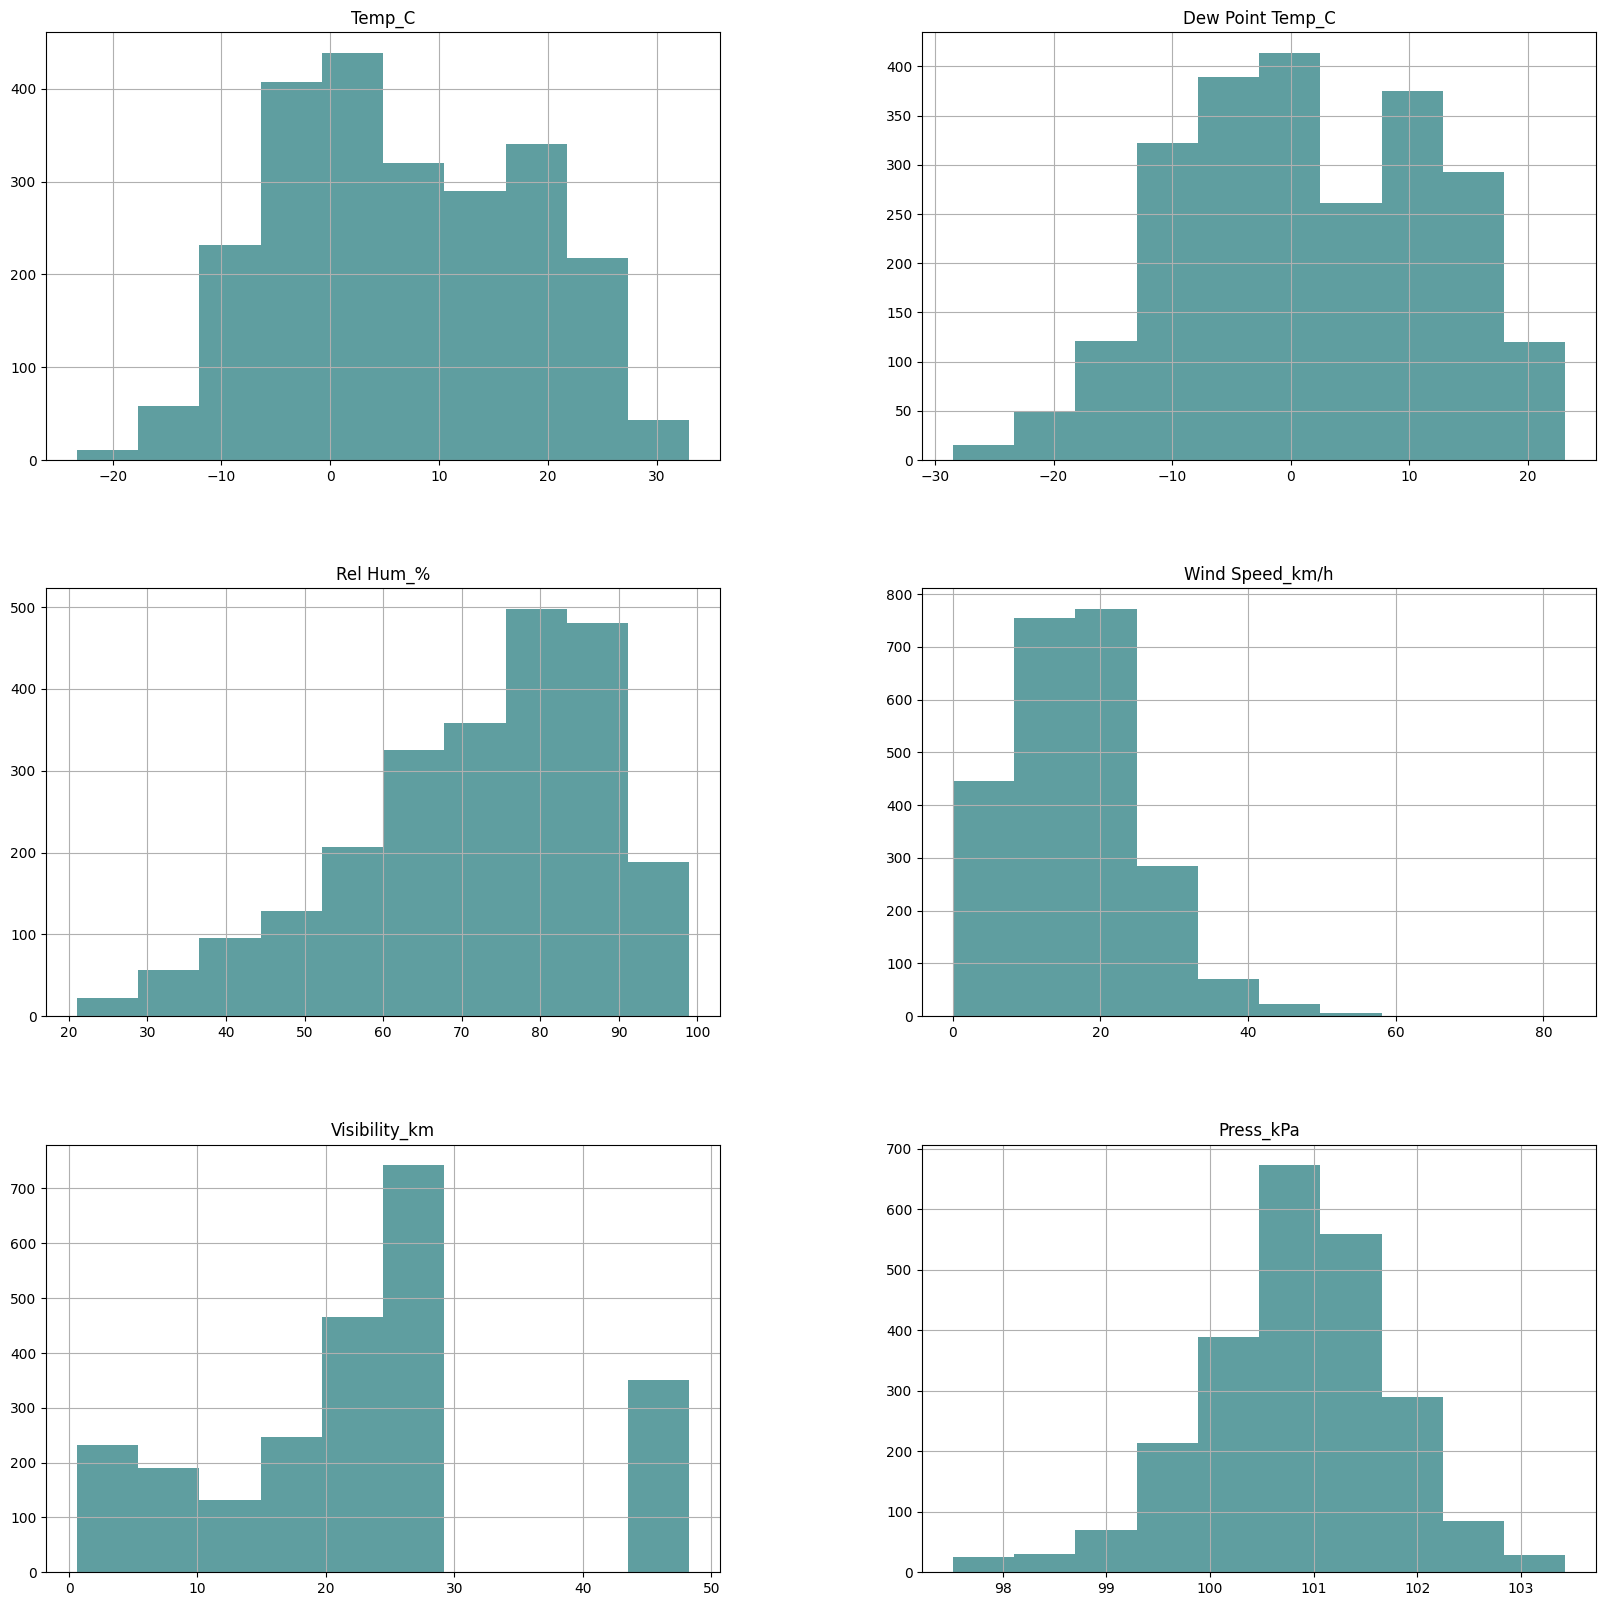

In [131]:
data_hist_plot=weather_df.hist(figsize=(20,20),color="#5F9EA0")

In [132]:
num_cols=weather_df.select_dtypes(exclude=['object']).columns.to_list()
num_cols

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

In [133]:
print(num_cols)
print(weather_df.columns)

['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'std_Weather'],
      dtype='object')


In [134]:
print(type(weather_df))

<class 'pandas.core.frame.DataFrame'>


In [135]:
num_cols = list(weather_df.select_dtypes(include=['number']).columns)

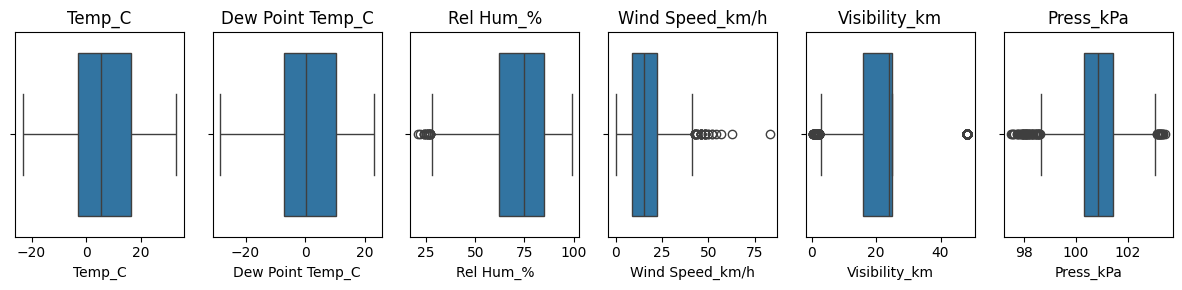

In [136]:
fig, axes = plt.subplots(ncols=6, figsize=(12, 3))

for column, axis in zip(num_cols, axes):
    sns.boxplot(x=weather_df[column], ax=axis)  # Use x instead of data
    axis.set_title(column)

plt.tight_layout()
plt.show()


In [137]:
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()

In [138]:
weather_df['std_Weather']=label_Encoder.fit_transform(weather_df['std_Weather'])

In [139]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [140]:
cat_code=dict(zip(label_Encoder.classes_,label_Encoder.transform(label_Encoder.classes_)))
cat_code

{'Clear': 0, 'Cloudy': 1, 'RAIN': 2, 'SNOW': 3}

In [141]:
weather_df.std_Weather.value_counts()

,count
std_Weather,
2,603
1,600
0,600
3,556


In [142]:
# Ensure 'Std_Weather' exists before dropping
if 'Std_Weather' in weather_df.columns:
    X = weather_df.drop(['Std_Weather'], axis=1)
    y= weather_df['Std_Weather']  # Correct way to select a single c


In [143]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [144]:
X_std=std_scaler.fit_transform(X)
X_std

array([[ 0.56523231,  0.23924073, -1.12851975, -0.16835947,  0.05245397,
         0.85655163],
       [-0.63695968, -0.61064905,  0.01414061, -1.12049774,  0.12576572,
        -0.44269493],
       [-0.51499818, -0.55461236, -0.23978392,  0.36060624,  0.12576572,
         1.67540451],
       ...,
       [-0.39303667, -0.05028216,  1.28376322,  2.15908964, -0.99020213,
        -3.58708997],
       [-0.38432513,  0.00575453,  1.47420662, -0.16835947, -1.12053414,
        -3.52158174],
       [-0.48015203, -0.1156583 ,  1.41072549,  0.57219252, -1.12053414,
        -3.45607351]])

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1842, 6), (461, 6))

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [147]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB=GaussianNB()

In [148]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
import pandas as pd  # Ensure pandas is imported

# Define your models properly before using them
models = [LR, DT, RF, ETC, SVM, KNN, GBC, ABC, NB]

features = X_std
labels = y
CV = 5

accu_list = []
ModelName = []

# Iterate over models and compute cross-validation scores
for model in models:
    model_name = model.__class__.__name__  # Get model's name
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)

    accu_list.append(accuracies.mean() * 100)  # Store mean accuracy
    ModelName.append(model_name)  # Store model name

# Debugging: Check list lengths
print(f"Length of ModelName: {len(ModelName)}, Length of accu_list: {len(accu_list)}")

# Ensure both lists have the same length
if len(ModelName) == len(accu_list):
    model_acc_df = pd.DataFrame({"Model": ModelName, "cross_Val_Accuracy": accu_list})
    print(model_acc_df)
else:
    print("Error: Mismatch in lengths of ModelName and accu_list.")


Length of ModelName: 9, Length of accu_list: 9
                        Model  cross_Val_Accuracy
0          LogisticRegression           58.879940
1      DecisionTreeClassifier           49.974818
2      RandomForestClassifier           59.486089
3        ExtraTreesClassifier           58.878336
4                         SVC           58.748184
5        KNeighborsClassifier           53.234651
6  GradientBoostingClassifier           58.573800
7          AdaBoostClassifier           58.444308
8                  GaussianNB           56.361596


In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [150]:
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)



In [151]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       114
           1       0.49      0.46      0.48       127
           2       0.80      0.78      0.79       121
           3       0.65      0.62      0.63        99

    accuracy                           0.64       461
   macro avg       0.64      0.64      0.64       461
weighted avg       0.64      0.64      0.63       461



<Axes: >

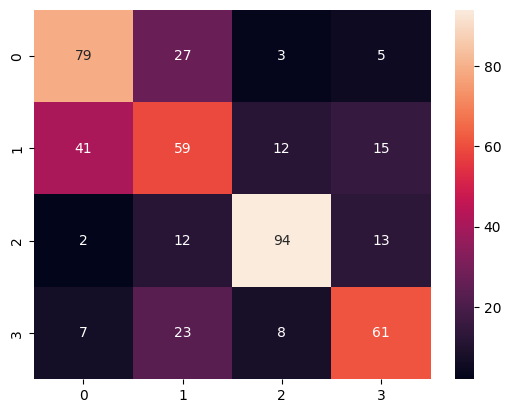

In [152]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm,annot = True,fmt='d')

In [153]:
from  sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [154]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],  # Correct parameter name
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]})

In [155]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}

In [156]:
Random_forest_model_new=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=100)

In [157]:
Random_forest_model_new.fit(x_train,y_train)
y_pred_rf=Random_forest_model_new.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.6420824295010846

In [158]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
295,-5.1,-7.7,82,22,16.1,98.84,1
6882,8.8,-2.4,45,7,25.0,102.01,1
8162,-2.9,-9.4,61,17,25.0,102.21,1
1074,1.3,-3.9,68,9,25.0,101.08,1
4513,25.1,17.2,62,11,25.0,100.40,1


In [159]:
Temp = float(input('Enter the Temp_C ='))
det=float(input('Enter the Dew Point Temp c='))
rh=float(input('enter the Relative humidity %='))
ws=float(input('enter the Wind Speed(Km/hr) %='))
vs=float(input('enter the visibility_Km='))
pr=float(input('enter the Pressure Kpa='))

Enter the Temp_C =13.3
Enter the Dew Point Temp c=7.5
enter the Relative humidity %=60
enter the Wind Speed(Km/hr) %=25
enter the visibility_Km=24
enter the Pressure Kpa=10


In [161]:
input_data=[Temp,det,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction

array([1])

In [162]:
if prediction[0]==0:
  print('weather is "CLEAR"')
elif prediction[0]==1:
  print('weather is "CLOUDY')
elif prediction[0]==2:
  print('weather is "RAINY')
else:
   print('weather is "SNOWY')

weather is "CLOUDY


In [163]:
Temp = float(input('Enter the Temp_C ='))
det=float(input('Enter the Dew Point Temp c='))
rh=float(input('enter the Relative humidity %='))
ws=float(input('enter the Wind Speed(Km/hr) %='))
vs=float(input('enter the visibility_Km='))
pr=float(input('enter the Pressure Kpa='))


input_data=[Temp,det,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction

print("")
print("******Weather Prediction Machine Learning Model*******")
print("")

if prediction[0]==0:
  print('weather is "CLEAR"')
elif prediction[0]==1:
  print('weather is "CLOUDY')
elif prediction[0]==2:
  print('weather is "RAINY')
else:
   print('weather is "SNOWY')


Enter the Temp_C =12
Enter the Dew Point Temp c=-10.2
enter the Relative humidity %=64
enter the Wind Speed(Km/hr) %=20
enter the visibility_Km=19
enter the Pressure Kpa=100.2

******Weather Prediction Machine Learning Model*******

weather is "RAINY
